In [1]:
from matplotlib.ticker import EngFormatter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import statsmodels as sm
import scipy.stats as sps
import statsmodels.formula.api as smf
import bar_chart_race as bcr
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install ffmpeg-python

Note: you may need to restart the kernel to use updated packages.


# 
INTRODUCTION (ABOUT DATA SET)
This shift will continue as global consumers remain cautious of what they are spending their money on and how much, especially with inflationary pressures and rising costs of living. As a result, consumers will look for the best deals online and across borders, making global online shopping events a critical strategic tool for manufacturers and brands everywhere.

With e-commerce rising as a key retail channel generating strong revenue, manufacturers and brands are now encountering a new question of how to boost online sales and continue this growth momentum. Global online shopping festivals and events can be the next area to transform under the e-commerce evolution.

Underestimating them as a “one-time” event in the yearly sales calendar to generate “additional revenue” is a mistake. In fact, participating in these global online shopping festivals and events can be beneficial for brands in many ways, especially if they are looking for cross-border opportunities. Thanks to e-commerce and its technology, brands can easily set up their online space on global platforms without having to invest the same amount of money required when building physical stores —while avoiding any potential risks this strategy presents.

With the right data brands can test and track how their products perform by platform and market, which can help decide where to allocate resources and invest in advertising and promotions to improve overall ROI for their business.

In [3]:
df_ecom = pd.read_csv('ecom.csv')

In [4]:
df_ecom.head()

accessed_date  duration_(secs) network_protocol             ip   bytes  \
0    14-03-2017             2533              TCP   1.10.195.126   20100   
1    14-03-2017             4034              TCP    1.1.217.211   20500   
2    14-03-2017             1525              TCP  1.115.198.107   90100   
3    14-03-2017             4572              TCP  1.121.152.143  100300   
4    14-03-2017             3652              TCP  1.123.135.213  270200   

     accessed_Ffom age  gender country membership language      sales  \
0           Chrome  28  Female      CA     Normal  English     261.96   
1  Mozilla Firefox  21    Male      AR     Normal  English     731.94   
2  Mozilla Firefox  20    Male      PL     Normal  English      14.62   
3  Mozilla Firefox  66  Female      IN     Normal  Spanish  9.575.775   
4  Mozilla Firefox  53  Female      KR     Normal  Spanish     22.368   

  returned returned_amount   pay_method  
0       No               0  Credit Card  
1       No               0   Debit Card  
2       No               0         Cash  
3       No               0  Credit Card  
4       No               0         Cash

In [5]:
df_ecom.columns

Index(['accessed_date', 'duration_(secs)', 'network_protocol', 'ip', 'bytes',
       'accessed_Ffom', 'age', 'gender', 'country', 'membership', 'language',
       'sales', 'returned', 'returned_amount', 'pay_method'],
      dtype='object')

In [6]:
df = df_ecom[['accessed_date', 'duration_(secs)', 'country']]

In [7]:
df.head()

accessed_date  duration_(secs) country
0    14-03-2017             2533      CA
1    14-03-2017             4034      AR
2    14-03-2017             1525      PL
3    14-03-2017             4572      IN
4    14-03-2017             3652      KR

# 
OBJECTIVES 

1.Geographical Analysis:Explore how user activity and behavior varies across different countries.

2.Demographic Insights:Explore the age and gender distribution of users using bar charts or pie charts.

3.Payment Method Insights:Explore the distribution of payment methods used by users.

4.Language Preferences:Analyze user engagement based on language preferences.

5.Periodic Trends:Use dynamic charts to identify periodic trends, such as weekly or monthly patterns in user engagement.

6.Sales Performance:Analyze the impact of different factors on sales, such as age group, gender, or country.

7.User Engagement Analysis:Use dynamic line charts or bar charts to analyze the patterns of user engagement over time.

8.Identify Peak Engagement Periods:Analyze whether there are specific times when users of certain languages are more active.

9.Sales Performance:Analyze the impact of different factors on sales, such as age group, gender, or country.

10.Track mean duration over time for different payment methods.

11.Visualize total duration based on country, payment method, and date.

12.Identify top countries based on total duration for a specific year.

13.Analyze total duration of access across countries over time.

14.Understand trends in payment method usage over time.

In [8]:
df1 = df.pivot_table(values = 'duration_(secs)',index = ['accessed_date'], columns = 'country',aggfunc=sum)

In [9]:
df1.head()

country           AE       AR       AT       AU       CA       CH       CN  \
accessed_date                                                                
14-03-2017     72890  1218392  1767713  1731999  6703485  3101095  3856588   
15-03-2017     90485  1223247  1784758  1694282  6685189  3134075  3829708   
16-03-2017     85997  1207725  1754681  1700542  6740213  3127765  3851694   
17-03-2017     79487  1227102  1820296  1700620  6724851  3094413  3811069   
18-03-2017     81313  1199026  1777989  1713248  6759916  3024431  3793065   

country            CO      DE     DK  ...      KR      MX       NO      PE  \
accessed_date                         ...                                    
14-03-2017     569776  798568  90843  ...  813081  416050  1394086  409258   
15-03-2017     592346  821502  80413  ...  824959  416966  1399945  400239   
16-03-2017     571808  818876  85431  ...  811277  410862  1393972  399234   
17-03-2017     575455  854701  76758  ...  831272  404340  1397779  415477   
18-03-2017     583099  825907  81015  ...  818158  409848  1398051  420338   

country             PL      PR       RU       SE        US       ZA  
accessed_date                                                        
14-03-2017     2511430  662268  3549091  1726695  10416120  1196694  
15-03-2017     2508708  645228  3548061  1714136  11510493   101700  
16-03-2017     2503351  653201  3578063  1659617  10619839  1088252  
17-03-2017     2538897  656751  3607987  1695138  11820940    24620  
18-03-2017     2486150  657860  3608377  1670468  11639789    12029  

[5 rows x 27 columns]

In [10]:
df1.fillna(0, inplace=True)
df1.sort_values(list(df1.columns),inplace=True)
df1 = df1.sort_index()
df1.head()

country           AE       AR       AT       AU       CA       CH       CN  \
accessed_date                                                                
14-03-2017     72890  1218392  1767713  1731999  6703485  3101095  3856588   
15-03-2017     90485  1223247  1784758  1694282  6685189  3134075  3829708   
16-03-2017     85997  1207725  1754681  1700542  6740213  3127765  3851694   
17-03-2017     79487  1227102  1820296  1700620  6724851  3094413  3811069   
18-03-2017     81313  1199026  1777989  1713248  6759916  3024431  3793065   

country            CO      DE     DK  ...      KR      MX       NO      PE  \
accessed_date                         ...                                    
14-03-2017     569776  798568  90843  ...  813081  416050  1394086  409258   
15-03-2017     592346  821502  80413  ...  824959  416966  1399945  400239   
16-03-2017     571808  818876  85431  ...  811277  410862  1393972  399234   
17-03-2017     575455  854701  76758  ...  831272  404340  1397779  415477   
18-03-2017     583099  825907  81015  ...  818158  409848  1398051  420338   

country             PL      PR       RU       SE        US       ZA  
accessed_date                                                        
14-03-2017     2511430  662268  3549091  1726695  10416120  1196694  
15-03-2017     2508708  645228  3548061  1714136  11510493   101700  
16-03-2017     2503351  653201  3578063  1659617  10619839  1088252  
17-03-2017     2538897  656751  3607987  1695138  11820940    24620  
18-03-2017     2486150  657860  3608377  1670468  11639789    12029  

[5 rows x 27 columns]

In [11]:
df1.iloc[:, 0:-1] = df1.iloc[:, 0:-1].cumsum()
df1.head()

country            AE       AR       AT       AU        CA        CH  \
accessed_date                                                          
14-03-2017      72890  1218392  1767713  1731999   6703485   3101095   
15-03-2017     163375  2441639  3552471  3426281  13388674   6235170   
16-03-2017     249372  3649364  5307152  5126823  20128887   9362935   
17-03-2017     328859  4876466  7127448  6827443  26853738  12457348   
18-03-2017     410172  6075492  8905437  8540691  33613654  15481779   

country              CN       CO       DE      DK  ...       KR       MX  \
accessed_date                                      ...                     
14-03-2017      3856588   569776   798568   90843  ...   813081   416050   
15-03-2017      7686296  1162122  1620070  171256  ...  1638040   833016   
16-03-2017     11537990  1733930  2438946  256687  ...  2449317  1243878   
17-03-2017     15349059  2309385  3293647  333445  ...  3280589  1648218   
18-03-2017     19142124  2892484  4119554  414460  ...  4098747  2058066   

country             NO       PE        PL       PR        RU       SE  \
accessed_date                                                           
14-03-2017     1394086   409258   2511430   662268   3549091  1726695   
15-03-2017     2794031   809497   5020138  1307496   7097152  3440831   
16-03-2017     4188003  1208731   7523489  1960697  10675215  5100448   
17-03-2017     5585782  1624208  10062386  2617448  14283202  6795586   
18-03-2017     6983833  2044546  12548536  3275308  17891579  8466054   

country              US       ZA  
accessed_date                     
14-03-2017     10416120  1196694  
15-03-2017     21926613   101700  
16-03-2017     32546452  1088252  
17-03-2017     44367392    24620  
18-03-2017     56007181    12029  

[5 rows x 27 columns]

In [13]:
bcr.bar_chart_race(df = df1, sort='desc', n_bars=15, period_length=1200, title='country and sales')

#
OBSERVATIONS 

By comparing the number of transactions and the cumulative transaction time, you can gain insights into the efficiency of transactions in different countries. For example, a high number of transactions with short durations may indicate quick and frequent interactions.

1.Italy stands out as a country with a high number of transactions. Despite this, the total transaction time (cumulative duration) for Italy is relatively low.

2.The United States (USA) follows Italy in terms of the number of transactions. However, the total transaction time may be relatively higher compared to Italy.

3.Over the course of the animation, Australia overtakes Sweden in terms of cumulative transaction time. This suggests that Australia, at some point, experiences a significant increase in transaction durations.

Consider the implications of these observations for your business strategy. For instance, if Italy has a high transaction frequency with shorter durations, it might be an opportunity to optimize processes or encourage more extensive transactions.
The fact that Australia overtakes Sweden highlights the dynamic nature of user engagement. This could be influenced by various factors such as seasonal trends, promotional activities, or changes in user behavior.
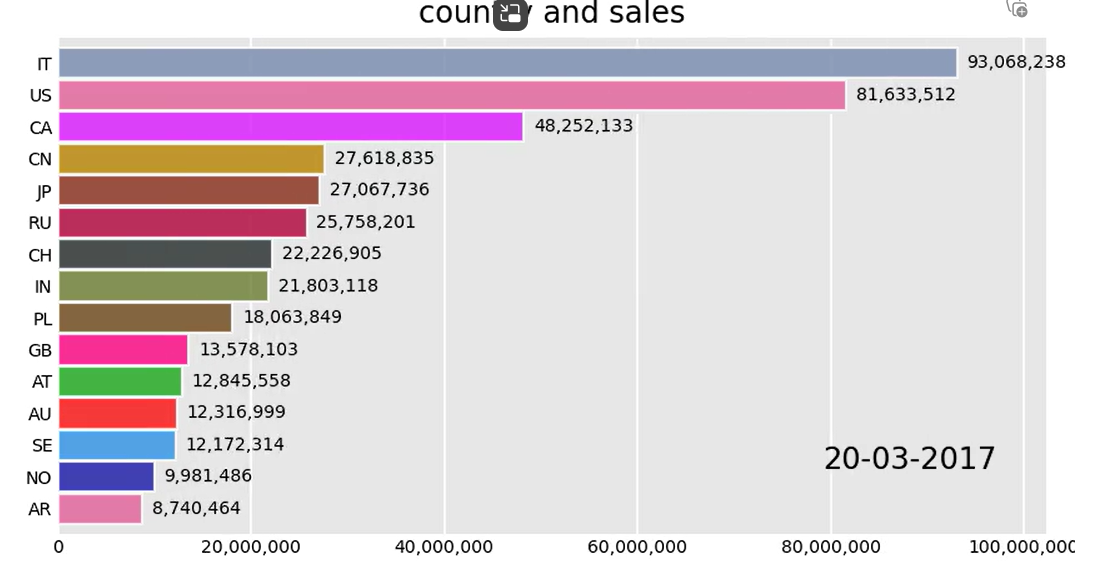

In [14]:
pip install plotly pandas

In [15]:
df1.columns

Index(['AE', 'AR', 'AT', 'AU', 'CA', 'CH', 'CN', 'CO', 'DE', 'DK', 'FI', 'FR',
       'GB', 'IE', 'IN', 'IT', 'JP', 'KR', 'MX', 'NO', 'PE', 'PL', 'PR', 'RU',
       'SE', 'US', 'ZA'],
      dtype='object', name='country')

In [16]:
# Select the year for which you want to find the top 10 countries
selected_year = 2017

df['accessed_date'] = pd.to_datetime(df['accessed_date'], format='%d-%m-%Y')

# Filter the DataFrame for the selected year
data_selected_year = df[df['accessed_date'].dt.year == selected_year]

# Extract the top 10 countries by 'duration_(secs)' for the selected year
top_10_countries_selected_year = data_selected_year.nlargest(10, 'duration_(secs)')['country'].tolist()

# Filter the DataFrame for the top 10 countries
top_10_data = df[df['country'].isin(top_10_countries_selected_year)]

# Display the top 10 countries' data for all years
print(top_10_data[['accessed_date', 'duration_(secs)', 'country']])

       accessed_date  duration_(secs) country
0         2017-03-14             2533      CA
5         2017-03-14             3847      CA
8         2017-03-14             3396      US
9         2017-03-14             2064      CA
11        2017-03-14             2973      CH
...              ...              ...     ...
172833    2017-03-22             4372      US
172834    2017-03-22             2167      IT
172835    2017-03-22             2725      IT
172836    2017-03-22             3728      US
172837    2017-03-22             3420      CA

[105355 rows x 3 columns]


In [17]:
# Convert 'accessed_date' to datetime format
top_10_data['accessed_date'] = pd.to_datetime(top_10_data['accessed_date'], format='%d-%m-%Y')

# Pivot the DataFrame
pivot_top10 = top_10_data.pivot_table(index='accessed_date', columns='country', values='duration_(secs)', aggfunc='sum')

# Fill NaN values with 0
pivot_top10.fillna(0, inplace=True)

# Display the resulting pivot table
print(pivot_top10)

country             CA       CH       GB        IT       RU        US
accessed_date                                                        
2017-03-14     6703485  3101095  1887401  13022901  3549091  10416120
2017-03-15     6685189  3134075  1908496  12927862  3548061  11510493
2017-03-16     6740213  3127765  1886589  12898846  3578063  10619839
2017-03-17     6724851  3094413  1865260  12929312  3607987  11820940
2017-03-18     6759916  3024431  1896708  12776690  3608377  11639789
2017-03-19     6680887  3065491  1864229  12898030  3596541  11688773
2017-03-20     6627371  3071211  1902785  13008765  3555648  11609909
2017-03-21     6651107  3042119  1833173  13029158  3572164  11638247
2017-03-22     4204645  1956787  1194395   8269423  2289999   7586584


In [18]:
# Create the bar chart race
bcr.bar_chart_race(
    df=pivot_top10,
    filename=None,  # You can specify a filename if you want to save the animation
    figsize=(6, 4),  # Adjust the figsize as needed
    title="Change in Duration for Top 10 Countries",
    steps_per_period=10,  # Adjust the steps_per_period as needed
    period_length=1200,
    interpolate_period=True,
    sort='desc',
)

# 
OBSERVATIONS 

1.Italy consistently maintains the highest duration among the top 10 countries throughout the observed time periods. This suggests that, in terms of the specified metric (duration), Italy is a dominant contributor.

2.The United States follows Italy and holds a significant position in terms of duration. It consistently appears as one of the top countries, indicating substantial activity or engagement over time.

3.While Italy and the USA show relatively stable and high durations, other countries among the top 10 may exhibit variability in their positions. This variability could be due to fluctuations in the recorded metric over different time periods.

4.Canada consistently appears among the top countries, following Italy and the USA. Its position suggests that it has a notable level of activity or engagement, though perhaps not as dominant as Italy and the USA.

5.The bar chart race format allows for the observation of dynamic changes over time. Viewers can witness how the positions of countries evolve, providing insights into trends, patterns, or shifts in engagement or activity.

6.The duration metric likely represents the amount of time spent or some form of user engagement. By observing the patterns in the bar chart race, one can gain insights into user behavior, such as peak activity periods or changes in user engagement patterns.
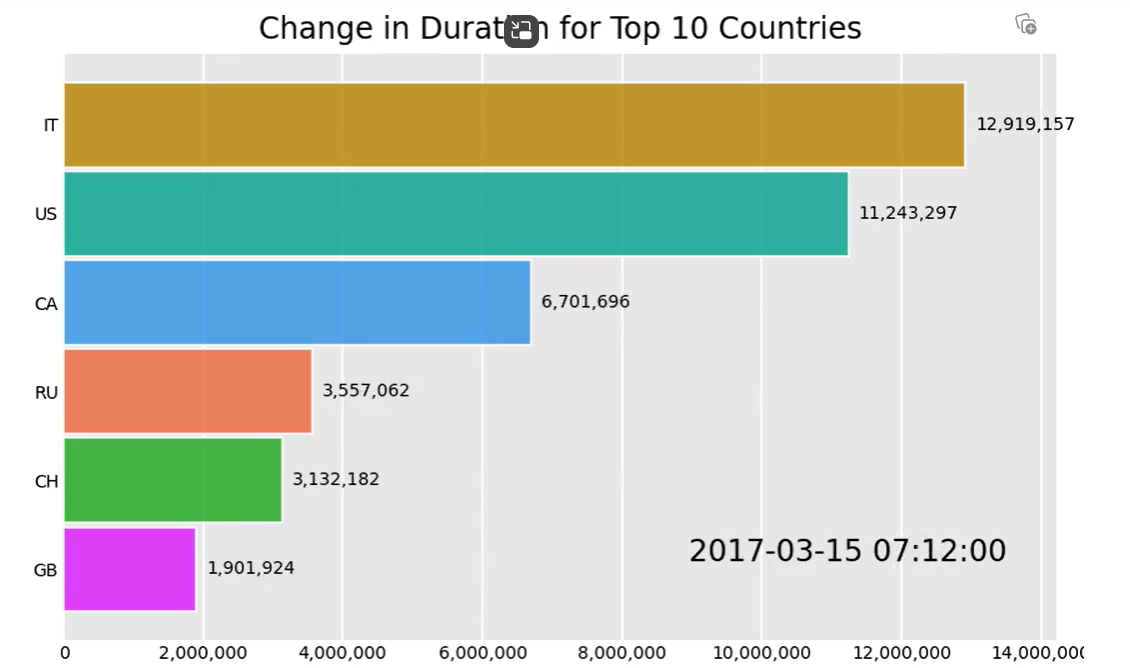

In [19]:
df.columns

Index(['accessed_date', 'duration_(secs)', 'country'], dtype='object')

In [20]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame
df_ecom['accessed_date'] = pd.to_datetime(df_ecom['accessed_date'], format='%d-%m-%Y')

# Group by 'accessed_date' and calculate the mean 'duration_(secs)'
grouped_data = df_ecom.groupby(['accessed_date','pay_method'])['duration_(secs)'].mean().reset_index()



In [21]:
# Convert 'accessed_date' to string for animation frame
grouped_data['accessed_date_str'] = grouped_data['accessed_date'].dt.strftime('%Y-%m-%d')

# Create a dynamic line chart using Plotly Express
fig = px.line(grouped_data, x='pay_method', y='duration_(secs)', markers=True,
              animation_frame='accessed_date_str',  # Specify the string representation for animation frame
              title='Dynamic Line Chart of Duration Over Time',
              labels={'duration_(secs)': 'Mean Duration (secs)'})

fig.update_layout(xaxis_title='Accessed Date', yaxis_title='Mean Duration (secs)')
fig.show()

# 
The interpretation of the observed trends in payment methods based on the dynamic line chart:

1.Credit Card Dominance:The consistent high usage of credit cards indicates that, overall, credit cards are the preferred or most frequently used payment method throughout the observed time period.

2.Cash and Debit Card Usage Trends:Cash and debit cards consistently show lower usage compared to credit cards. This indicates that users tend to favor credit cards over cash and debit cards for their transactions.

3.Temporal Patterns:The dynamic nature of the line chart allows for the identification of temporal patterns. Understanding these patterns can aid in optimizing strategies for different payment methods based on user behavior over time.

4.Strategic Considerations:Businesses can leverage this information to tailor marketing strategies or promotions specifically for credit card users, especially during peak periods.
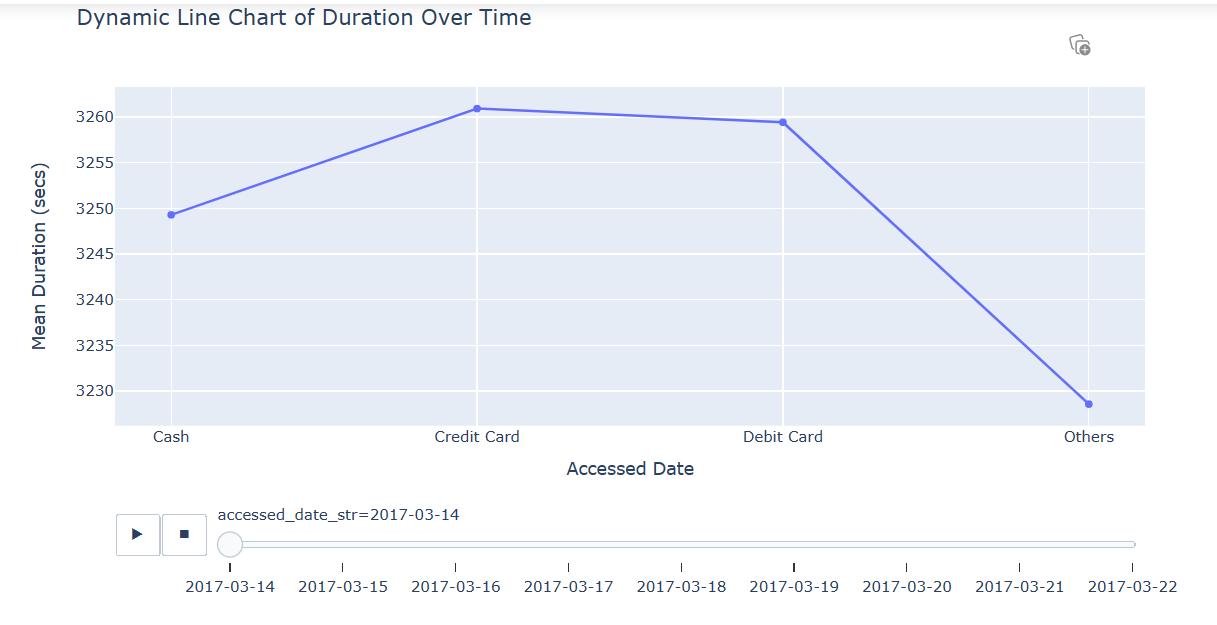

In [22]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame
df['accessed_date'] = pd.to_datetime(df['accessed_date'], format='%d-%m-%Y')

# Group by 'accessed_date', 'country', and calculate the mean 'duration_(secs)'
grouped_data = df.groupby(['accessed_date', 'country'])['duration_(secs)'].mean().reset_index()

# Convert 'accessed_date' to string
grouped_data['accessed_date_str'] = grouped_data['accessed_date'].dt.strftime('%Y-%m-%d')

# Create a dynamic line chart using Plotly Express with increased figsize
fig = px.line(grouped_data, x='country', y='duration_(secs)', color='country',
              markers=True, animation_frame='accessed_date_str',
              title='Dynamic Line Chart of Duration Over Time with Country',
              labels={'duration_(secs)': 'Mean Duration (secs)'})

fig.update_layout(xaxis_title='Accessed Date', yaxis_title='Mean Duration (secs)', autosize=False, width=1200, height=600)
fig.show()


# 
OBSERVATIONS 

1.Comparing the lines for different countries allows you to assess how user engagement patterns vary between nations. Some countries may consistently have higher mean durations, while others may show more fluctuation.

2.The significant variations in mean duration for UAE, Denmark, and Israel suggest that these countries may exhibit unique user engagement patterns compared to others. Understanding these patterns is crucial for tailoring strategies to the specific preferences and behaviors of users in each country.

3.Differences in culture, market dynamics, or user preferences may contribute to the observed variations. Investigate whether there are specific factors, events, or trends in UAE, Denmark, and Israel that influence user behavior and engagement differently from other countries.

4.Recognizing the substantial variations allows for the development of more targeted and localized marketing strategies. Consider creating campaigns, promotions, or content that resonate with the specific preferences and interests of users in UAE, Denmark, and Israel.
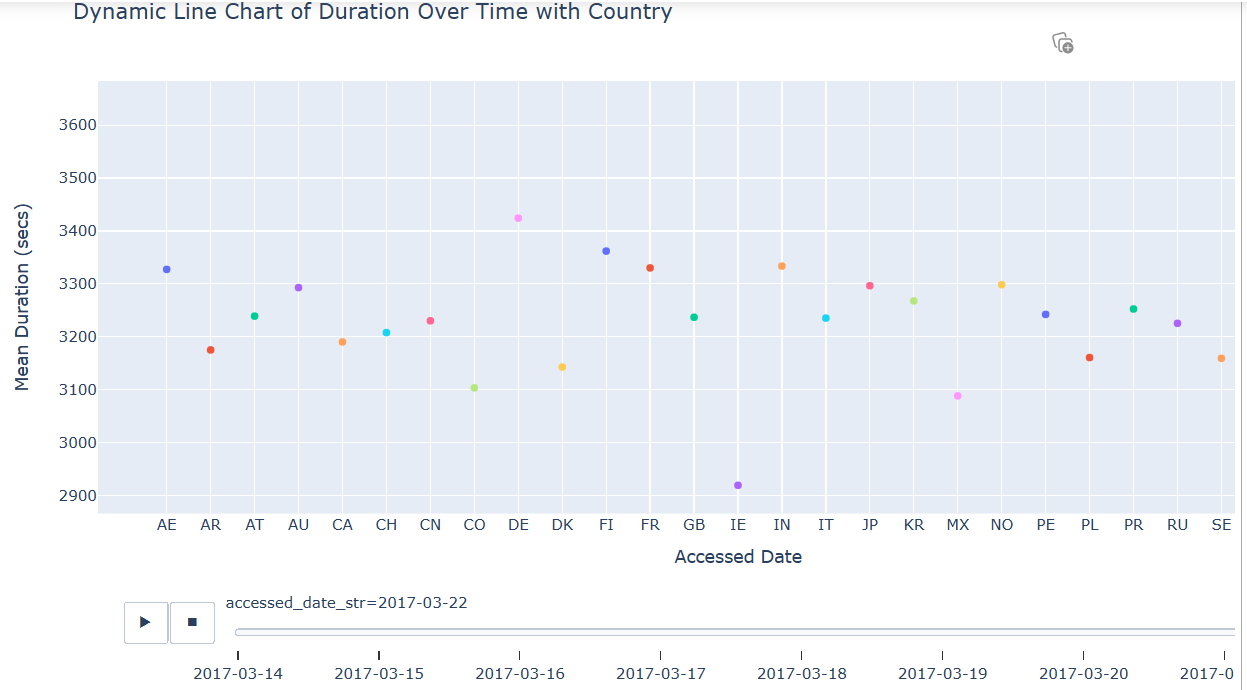

In [23]:
# Assuming df is your DataFrame
df['accessed_date'] = pd.to_datetime(df['accessed_date'], format='%d-%m-%Y')

# Group by 'accessed_date', 'country', and calculate the mean 'duration_(secs)'
grouped_data = df.groupby(['accessed_date', 'country'])['duration_(secs)'].mean().reset_index()
print(grouped_data)

    accessed_date country  duration_(secs)
0      2017-03-14      AE      2915.600000
1      2017-03-14      AR      3275.247312
2      2017-03-14      AT      3202.378623
3      2017-03-14      AU      3299.045714
4      2017-03-14      CA      3255.699369
..            ...     ...              ...
238    2017-03-22      PR      3252.449612
239    2017-03-22      RU      3225.350704
240    2017-03-22      SE      3159.229851
241    2017-03-22      US      3285.657861
242    2017-03-22      ZA      2817.285714

[243 rows x 3 columns]


In [24]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame
df['accessed_date'] = pd.to_datetime(df['accessed_date'], format='%d-%m-%Y')

# Print the column names to inspect them
print(df.columns)

# Continue with the rest of the code
# Group by 'accessed_date', 'country', and calculate the sum 'duration_(secs)'
grouped_data = df_ecom.groupby(['accessed_date', 'accessed_Ffom', 'pay_method'])['duration_(secs)'].sum().reset_index()

# Convert 'accessed_date' to string
grouped_data['accessed_date_str'] = grouped_data['accessed_date'].dt.strftime('%Y-%m-%d')

# Create a dynamic bar chart using Plotly Express
fig = px.bar(grouped_data, x='accessed_Ffom', y='duration_(secs)', color='accessed_Ffom',
             animation_frame='accessed_date_str',
             title='Dynamic Bar Chart of Duration Over Time by Country',
             labels={'duration_(secs)': 'Total Duration (secs)'})

fig.update_layout(xaxis_title='accessed_Ffom', yaxis_title='Total Duration (secs)',
                  autosize=False, width=800, height=500)

fig.show()


Index(['accessed_date', 'duration_(secs)', 'country'], dtype='object')


#
OBSERVATIONS

The chart provides a visual representation of how the total duration of access varies over time for different payment methods. Observing the height of the bars on each date allows for an understanding of the distribution of user activity across payment methods.

If the bars remain relatively constant over time, it suggests a stable and consistent distribution of user activity across payment methods. This may indicate that users tend to use the same payment methods consistently without significant fluctuations.

The chart allows for the identification of popular payment methods that consistently contribute to higher total durations. These methods may be preferred by users and could be a focus for marketing or promotional efforts.

Analyzing the dynamics of the chart enables businesses to gain insights into user behavior related to payment methods. Understanding which methods are preferred or exhibit variations over time can inform strategies to enhance user experiences.
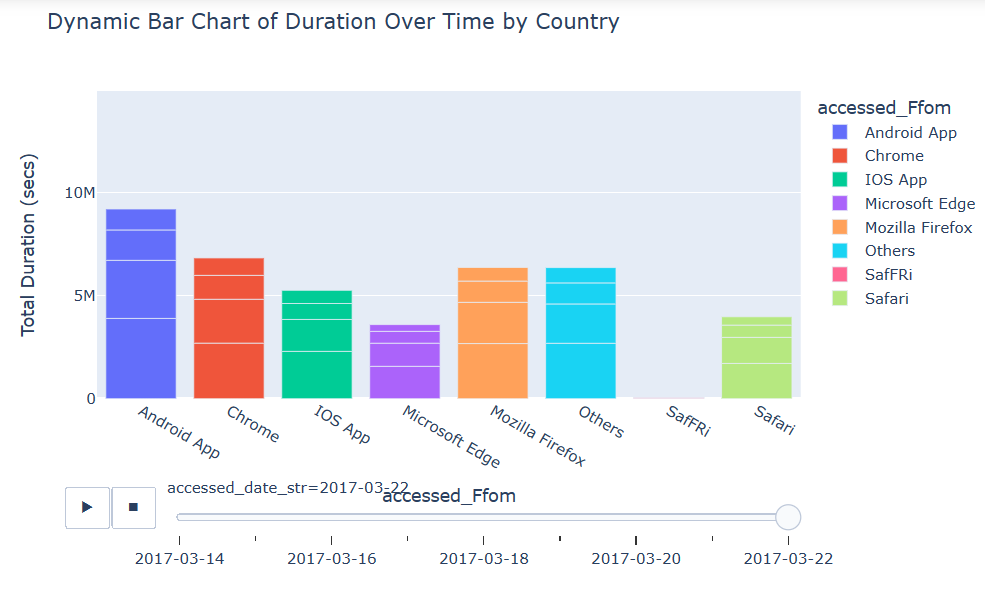


In [25]:
import plotly.express as px
import pandas as pd

# Assuming df_ecom is your DataFrame
df_ecom['accessed_date'] = pd.to_datetime(df_ecom['accessed_date'], format='%d-%m-%Y')

# Group by 'country' and calculate the sum 'duration_(secs)' for each country
grouped_data = df_ecom.groupby(['accessed_date', 'language'])['duration_(secs)'].sum().reset_index()

# Convert 'accessed_date' to string for animation frame
grouped_data['accessed_date_str'] = grouped_data['accessed_date'].dt.strftime('%Y-%m-%d')

# Create a dynamic area chart using Plotly Express
fig = px.area(grouped_data, x='language', y='duration_(secs)',
              title='Dynamic Area Chart of Duration Over Time by Country',
              labels={'duration_(secs)': 'Total Duration (secs)'},
              animation_frame='accessed_date_str')

fig.update_layout(xaxis_title='language', yaxis_title='Total Duration (secs)')

# If the chart is still empty, check the data
print(grouped_data)

fig.show()


    accessed_date language  duration_(secs) accessed_date_str
0      2017-03-14   Arabic           138102        2017-03-14
1      2017-03-14  Chinese         36189281        2017-03-14
2      2017-03-14    Dutch           191879        2017-03-14
3      2017-03-14  English           876247        2017-03-14
4      2017-03-14   French          3040715        2017-03-14
..            ...      ...              ...               ...
257    2017-03-22  slovene            14433        2017-03-22
258    2017-03-22  swahili            25391        2017-03-22
259    2017-03-22  swedish            39845        2017-03-22
260    2017-03-22   tegulu            11220        2017-03-22
261    2017-03-22     urdu            29259        2017-03-22

[262 rows x 4 columns]


# 
OBSERVATIONS

1.The increase in the area of Dutch over time, surpassing Chinese, suggests a shift in language preferences among users. Understanding these changes is crucial for adapting content and services to meet evolving user expectations.

2.The use of multiple languages, each with its own area in the chart, indicates a diverse user base. 

3.The increase in the area of Portuguese and Slovak languages over time may suggest a growing user base for these languages. This growth presents opportunities for targeted marketing efforts, content localization, and expansion into new markets.

4.Changes in the usage of Italian and Russian may be influenced by cultural or regional factors. Monitoring these fluctuations can help identify regions where certain languages are gaining or losing popularity.

5.Peaks and valleys in language areas represent periods of higher or lower engagement. Analyzing these patterns allows for the identification of events, campaigns, or external factors that impact user engagement in specific languages

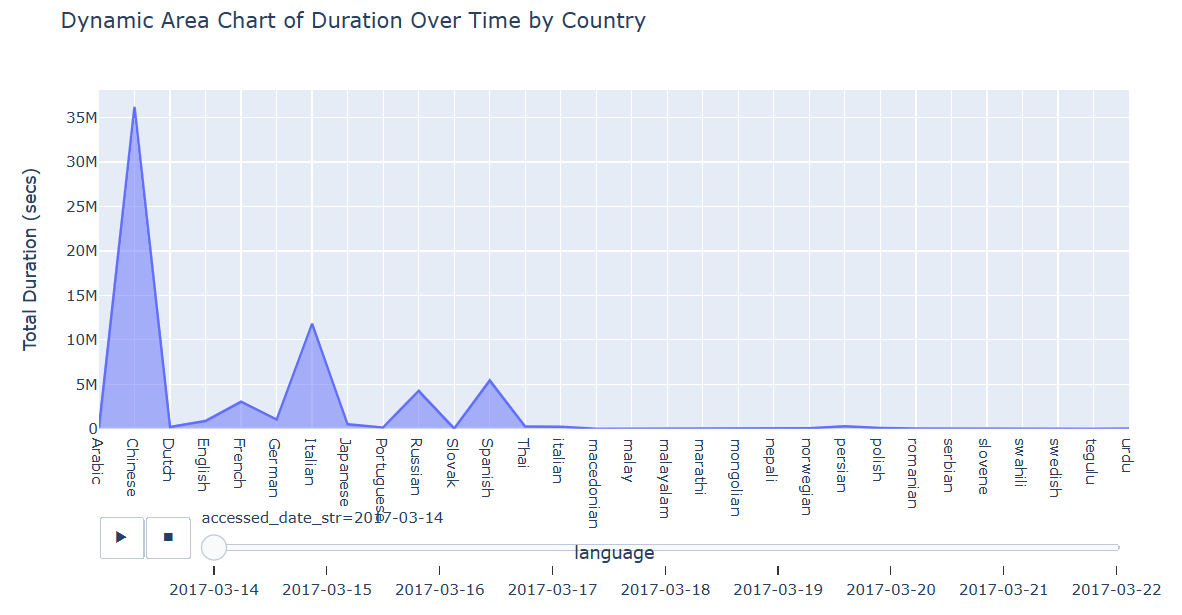


# 
MANAGERIAL IMPLICATIONS 

1.Focus marketing efforts on promoting credit card usage.Optimize user experiences for credit card transactions.Monitor anomalies on specific dates for potential issues or opportunities.

2.Identify countries with consistently high engagement for targeted efforts.Tailor content or promotions for specific regions based on user behavior.Adapt strategies for countries with varying trends to optimize user experiences.

3.Insights from the chart can guide efforts to enhance the user experience for different payment methods. Tailoring interfaces, providing incentives, or streamlining processes for preferred methods can positively impact user satisfaction.

4.Identify opportunities for optimization in user experience and content delivery in the countries with significant variations. Tailor the user journey, interface, or features to align with the observed engagement patterns.

5.Dive deeper into the data to understand the factors contributing to variations. Conduct user surveys, analyze user feedback, or explore external influences to gain insights into why users in these countries may engage differently.

6.Identify countries and payment methods contributing most to total duration.Assess the impact of promotions or campaigns on user engagement.Optimize resource allocation and marketing efforts based on observed trends.

7.Focus marketing efforts on high-engagement countries.Investigate reasons behind fluctuations in top countries.Adapt strategies based on identified top-performing countries.

8.Adapting user experiences based on language preferences is essential for providing personalized and relevant content. Businesses can tailor their platforms to better accommodate users who prefer specific languages, enhancing overall user satisfaction.

9.Observing language preferences over time can guide content localization strategies. If certain languages consistently show higher engagement, investing in localized content for those languages may enhance user satisfaction and retention.

10.Localize content for languages with increasing engagement.Adapt marketing strategies based on shifting language preferences.Enhance user experiences by tailoring platforms to accommodate diverse language needs.

11.Schedule promotions or content releases during peak engagement times.Consider time-sensitive offers to optimize user interactions.Adjust server capacities or conduct maintenance during periods of lower activity.

12.Stay agile and responsive to changing user behaviors.Regularly assess the effectiveness of marketing campaigns and user engagement strategies.Implement continuous improvement initiatives based on real-time data.

# 
REFERENCES 

1.CHAT GPT 
